In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
sns.set_style('darkgrid')

In [55]:
def find_four_peaks(dataframe):
    """
    Find the values of the four peaks and the saturation point in a Franck-Hertz experiment data series.

    Args:
        dataframe (pd.DataFrame): A pandas DataFrame containing 'U[V]' and 'I[nA]' columns.

    Returns:
        list: A list of the values of the four peaks and the saturation point in 'U[V]'.
    """
    # Verificar se o dataframe contém as colunas necessárias
    if 'U[V]' not in dataframe.columns or 'I[nA]' not in dataframe.columns:
        print("O dataframe não contém as colunas necessárias.")
        return []

    peak_values = []  
    peak_count = 0  

    for i in range(1, len(dataframe['I[nA]']) - 1):
        if (
            dataframe['I[nA]'][i] > dataframe['I[nA]'][i - 1] and
            dataframe['I[nA]'][i] > dataframe['I[nA]'][i + 1]
        ):
            peak_values.append(dataframe['U[V]'][i])
            peak_count += 1

        if peak_count == 4:
            break

    last_saturation = np.argmax(dataframe['I[nA]'][::-1])  
    peak_values.append(dataframe['U[V]'].iloc[-last_saturation - 1])  

    return peak_values


In [3]:
df = pd.read_csv('FranckHertz.csv', header=None)
df.columns = ['U[V]', 'I[nA]']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   U[V]    160 non-null    float64
 1   I[nA]   160 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB


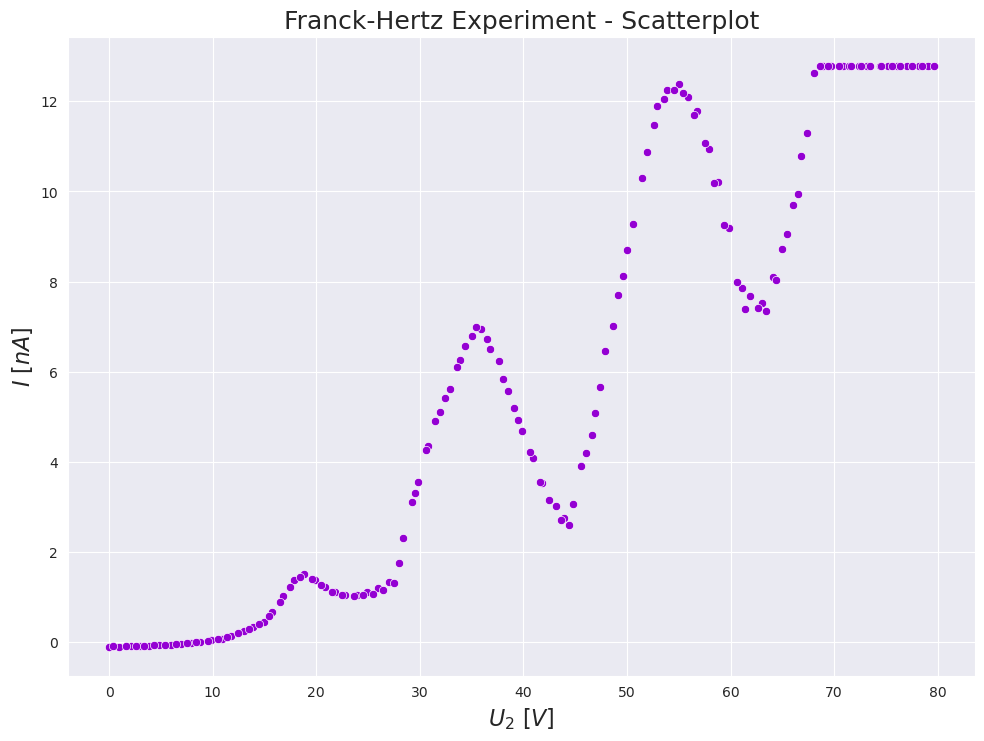

In [21]:
f = plt.figure(figsize=(11.7, 8.3))
plt.title('Franck-Hertz Experiment - Scatterplot', fontsize=18)
sns.scatterplot(x=df['U[V]'], y=df['I[nA]'], lw=4, color='darkviolet')
plt.xlabel(r'$U_{2}\ [V]$', fontsize=16)
plt.ylabel(r'$I\ [nA]$', fontsize=16)
plt.savefig('Franck-Hertz_scatter.pdf')
plt.show()

In [5]:
df.to_excel('Franck-Hertz.xlsx', sheet_name='collected_data', index=False)

In [7]:
df1 = df.iloc[:80, :]
df2 = df.iloc[80:, :]
df2.reset_index(drop=True, inplace=True)

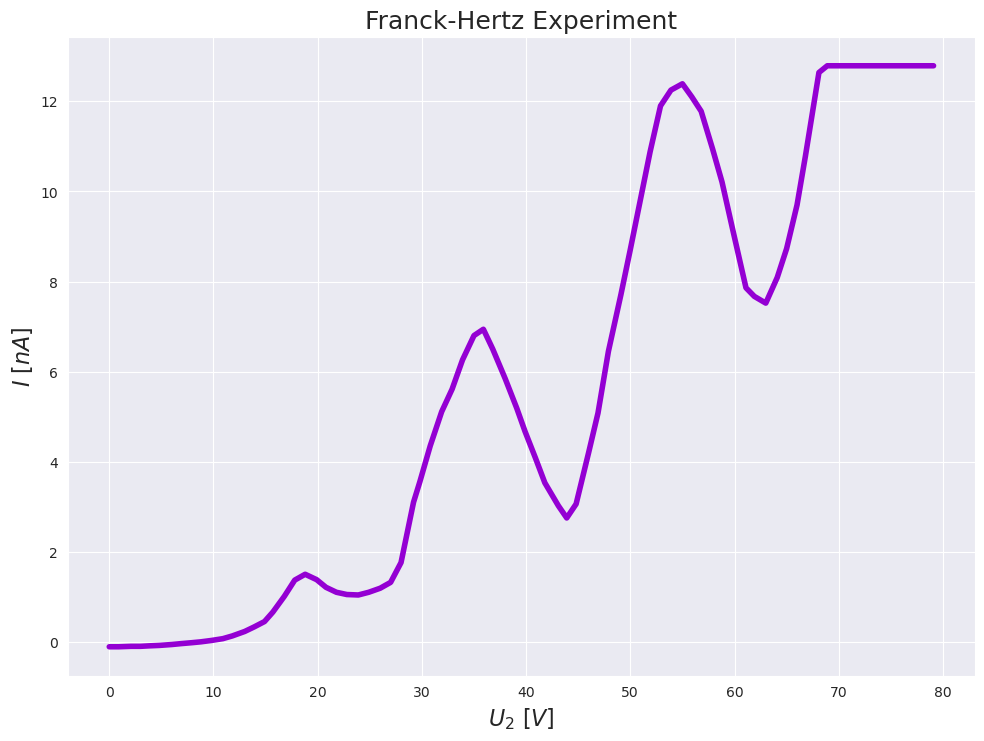

In [49]:
f = plt.figure(figsize=(11.7, 8.3))
plt.title('Franck-Hertz Experiment', fontsize=18)
sns.lineplot(x=df1['U[V]'], y=df1['I[nA]'], lw=4, color='darkviolet')
plt.xlabel(r'$U_{2}\ [V]$', fontsize=16)
plt.ylabel(r'$I\ [nA]$', fontsize=16)
plt.savefig('Franck-Hertz_1.pdf')
plt.show()

In [10]:
peaks_found_df1 = find_four_peaks(df1['I[nA]'])
print("Valores dos quatro picos e ponto de saturação encontrados:", peaks_found_df1)

Valores dos quatro picos e ponto de saturação encontrados: [1.5, 6.94, 12.39, 12.79]


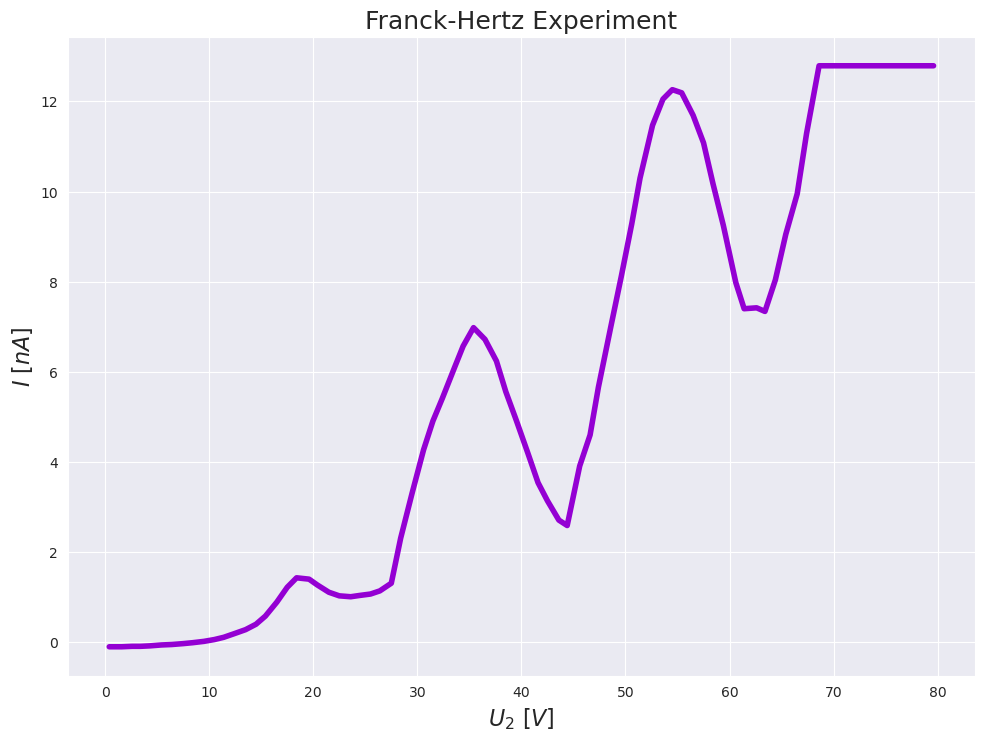

In [50]:
f = plt.figure(figsize=(11.7, 8.3))
plt.title('Franck-Hertz Experiment', fontsize=18)
sns.lineplot(x=df2['U[V]'], y=df2['I[nA]'], lw=4, color='darkviolet')
plt.xlabel(r'$U_{2}\ [V]$', fontsize=16)
plt.ylabel(r'$I\ [nA]$', fontsize=16)
plt.savefig('Franck-Hertz_2.pdf')
plt.show()

In [48]:
peaks_found = find_four_peaks(df)
peaks_found = peaks_found[:3]
print("Valores dos quatro picos e ponto de saturação encontrados:", peaks_found)

Valores dos quatro picos e ponto de saturação encontrados: [18.8, 35.9, 55.0]


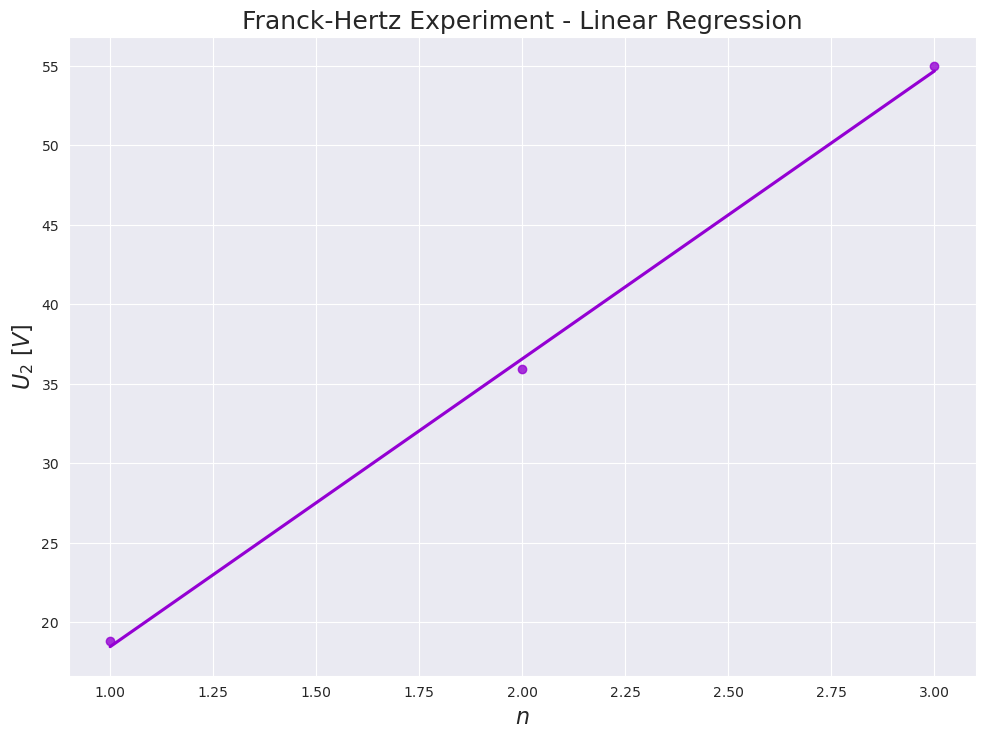

In [61]:
f = plt.figure(figsize=(11.7, 8.3))
plt.title('Franck-Hertz Experiment - Linear Regression', fontsize=18)

n = [i for i in range(1, 4)]
n_df = pd.DataFrame(
    {
        'n' : n,
        'peaks' : peaks_found[:3]
    }
)

sns.regplot(x=n_df['n'], y=n_df['peaks'], color='darkviolet', ci=None)
plt.xlabel(r'$n$', fontsize=16)
plt.ylabel(r'$U_{2}\ [V]$', fontsize=16)
plt.savefig('Franck-Hertz_linear_regression.pdf')
plt.show()

In [54]:
slope, intercept, r_value, p_value, std_err = linregress(n_df['n'], n_df['peaks'])